In [1]:
import pandas as pd
import numpy as np

In [2]:
years = range(1880, 2020)

In [3]:
pieces = []

In [4]:
columns = ['name', 'sex', 'births']

In [5]:
for year in years:
    path = 'dataset/yob%d.txt' % year
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)
    
    

In [6]:
# Collect all data into one DataFrame object
names = pd.concat(pieces, ignore_index = True)


In [7]:
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1989587,Zyheem,M,5,2019
1989588,Zykel,M,5,2019
1989589,Zyking,M,5,2019
1989590,Zyn,M,5,2019


In [8]:
total_births = names.pivot_table('births', index='year', columns = 'sex', aggfunc = sum)

In [9]:
total_births.tail()

sex,F,M
year,,
2015,1782079,1913452
2016,1768360,1893917
2017,1722140,1846154
2018,1695654,1810309
2019,1670419,1785527


<AxesSubplot:title={'center':'Total births by sex and year'}, xlabel='year', ylabel='quantity'>

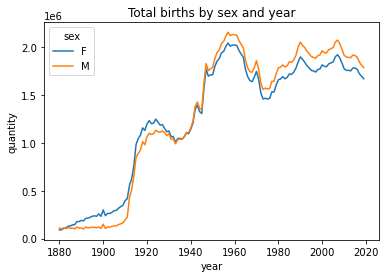

In [10]:
total_births.plot(title = 'Total births by sex and year', ylabel = 'quantity')

In [11]:
def add_prop(group):
    births = group.births.astype(float)
    group['prop'] = births/births.sum()
    return group


In [12]:
names = names.groupby(['sex', 'year']).apply(add_prop)

In [13]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1989587,Zyheem,M,5,2019,0.000003
1989588,Zykel,M,5,2019,0.000003
1989589,Zyking,M,5,2019,0.000003
1989590,Zyn,M,5,2019,0.000003


In [14]:
names.groupby(['sex', 'year']).prop.sum()

sex  year
F    1880    1.0
     1881    1.0
     1882    1.0
     1883    1.0
     1884    1.0
            ... 
M    2015    1.0
     2016    1.0
     2017    1.0
     2018    1.0
     2019    1.0
Name: prop, Length: 280, dtype: float64

In [15]:
# extracting a subset of data to simplify subsequent analysis
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]
# asceding = True - сортировка по убыванию
top1000 = names.groupby(['sex', 'year']).apply(get_top1000)


In [16]:
top1000

name sex  births  year      prop
sex year                                               
F   1880 0             Mary   F    7065  1880  0.077642
         1             Anna   F    2604  1880  0.028617
         2             Emma   F    2003  1880  0.022012
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
...                     ...  ..     ...   ...       ...
M   2019 1976505     Yadiel   M     210  2019  0.000118
         1976509      Seven   M     209  2019  0.000117
         1976510      Stone   M     209  2019  0.000117
         1976506      Aayan   M     209  2019  0.000117
         1976508       Rome   M     209  2019  0.000117

[279876 rows x 5 columns]

In [17]:
# Deleting the group index, it is no longer needed
top1000.reset_index(inplace = True, drop = True)

In [18]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077642
1,Anna,F,2604,1880,0.028617
2,Emma,F,2003,1880,0.022012
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
279871,Yadiel,M,210,2019,0.000118
279872,Seven,M,209,2019,0.000117
279873,Stone,M,209,2019,0.000117
279874,Aayan,M,209,2019,0.000117


## Анализ тенденций в выборе имен

In [19]:
boys = top1000[top1000.sex == 'M']

In [20]:
girls = top1000[top1000.sex == 'F']

In [21]:
# breaking the top1000-set into parts related to boys and girls

In [22]:
total_births = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)

In [23]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 1880 to 2019
Columns: 7216 entries, Aaden to Zyon
dtypes: float64(7216)
memory usage: 7.7 MB


array([<AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>,
       <AxesSubplot:xlabel='year'>, <AxesSubplot:xlabel='year'>],
      dtype=object)

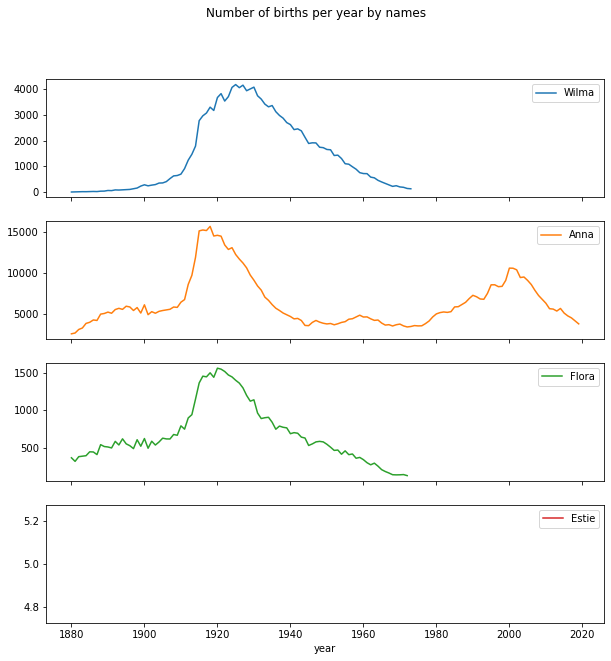

In [26]:
subset = total_births[['Wilma', 'Anna', 'Flora', 'Estie']]
subset.plot(subplots=True, figsize=(10, 10), grid=False, title="Number of births per year by names")

## Измерение роста разнообразия имен

<AxesSubplot:title={'center':'Sum of table1000.prop by year and sex'}, xlabel='year'>

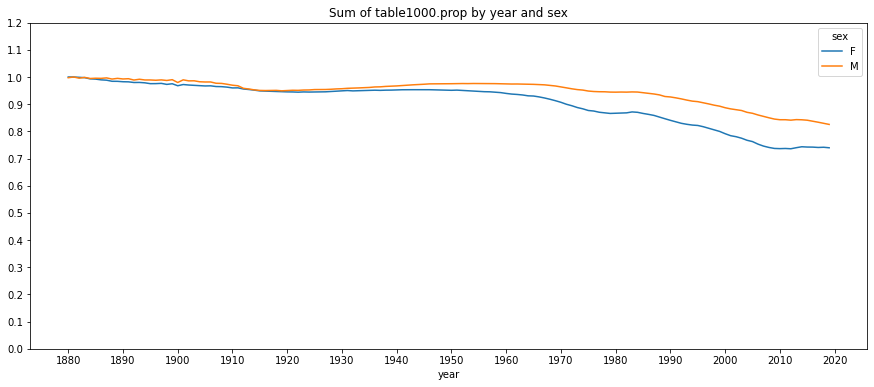

In [27]:
table = top1000.pivot_table('prop', index ='year', columns = 'sex', aggfunc = sum)
table.plot(title='Sum of table1000.prop by year and sex', yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2030, 10), figsize=(15, 6))

In [34]:
boys2019 = boys[boys.year == 2019]

In [35]:
boys2019

,name,sex,births,year,prop
278876,Liam,M,20555,2019,0.011512
278877,Noah,M,19097,2019,0.010695
278878,Oliver,M,13929,2019,0.007801
278879,William,M,13599,2019,0.007616
278880,Elijah,M,13339,2019,0.007471
...,...,...,...,...,...
279871,Yadiel,M,210,2019,0.000118
279872,Seven,M,209,2019,0.000117
279873,Stone,M,209,2019,0.000117
279874,Aayan,M,209,2019,0.000117


In [44]:
prop_cumsum = boys2019.sort_values(by = 'prop', ascending = False).prop.cumsum()

In [45]:
prop_cumsum[:10]

278876    0.011512
278877    0.022207
278878    0.030009
278879    0.037625
278880    0.045095
278881    0.052450
278882    0.059719
278883    0.066689
278884    0.073094
278885    0.079403
Name: prop, dtype: float64

In [46]:
prop_cumsum.values.searchsorted(0.5)

154

In [50]:
boys1990 = boys[boys.year == 1990]


In [55]:
in1990 = boys1990.sort_values(by = 'prop', ascending = False).prop.cumsum()

In [56]:
in1990.values.searchsorted(0.5) + 1

45

In [58]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_values(by = 'prop', ascending = False)
    return group.prop.cumsum().values.searchsorted(q) + 1
    

In [59]:
diversity = top1000.groupby(['sex', 'year']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [61]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


<AxesSubplot:title={'center':'Number of popular names in top 50%'}, xlabel='year'>

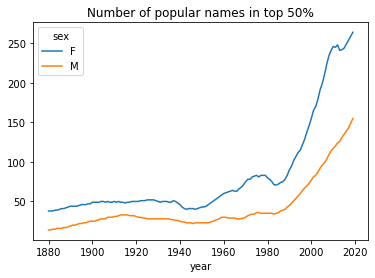

In [63]:
diversity.plot(title = 'Number of popular names in top 50%')